In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Read in the file
file = "../Data/us_videos_cleaned_2.csv"
df = pd.read_csv(file)
df.head()

,video_id,publish_time,trending_date,publish_to_trend,days_trending,title,channel_title,category_id,category_name,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tags_count
0,2kyS6SvSYSE,2017-11-13 17:13:01,2017-11-14,0,7,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,SHANtell martin,748374,57527,2966,15954,False,False,False,1
1,1ZAPwfrtAFY,2017-11-13 07:30:00,2017-11-14,0,7,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,4
2,5qpjK5DgCt4,2017-11-12 19:05:24,2017-11-14,1,7,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,23
3,puqaWrEC7tY,2017-11-13 11:00:04,2017-11-14,0,7,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,27
4,d380meD0W0M,2017-11-12 18:01:41,2017-11-14,1,6,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,14


<AxesSubplot:ylabel='comments_disabled'>

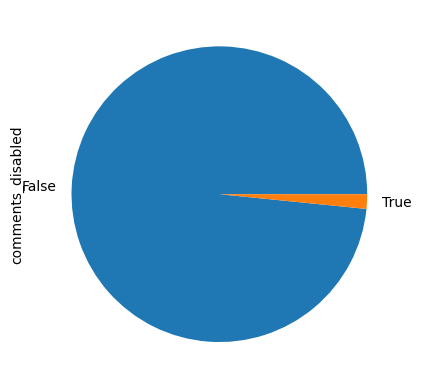

In [3]:
# check on the columns with boolean values (comments_disabled, ratings_disabled, video_error_or_removed)
df.comments_disabled.value_counts().plot(kind="pie")


<AxesSubplot:ylabel='ratings_disabled'>

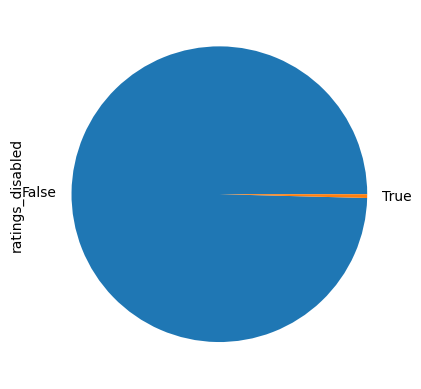

In [4]:
df.ratings_disabled.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='video_error_or_removed'>

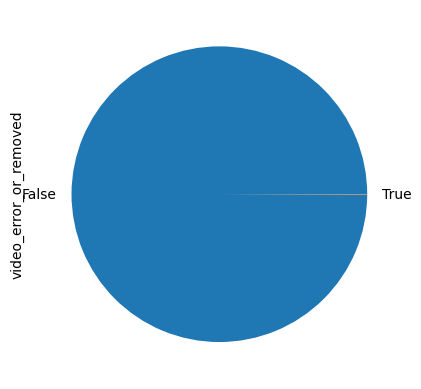

In [5]:
df.video_error_or_removed.value_counts().plot(kind="pie")

In [6]:
# Drop comments_disabled, ratings_disabled, and video_error_or_reoved columns
df = df.drop(columns=['comments_disabled', 'ratings_disabled', 'video_error_or_removed'])

In [7]:
# Create tiers column for the datafram which tier_1 = publish_to_trend < 1, tier_2 = publish_to_trend >= 1
df['tiers'] = ["tier_1" if i < 1 else "tier_2" for i in df.publish_to_trend]

In [8]:
df

,video_id,publish_time,trending_date,publish_to_trend,days_trending,title,channel_title,category_id,category_name,tags,views,likes,dislikes,comment_count,tags_count,tiers
0,2kyS6SvSYSE,2017-11-13 17:13:01,2017-11-14,0,7,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,SHANtell martin,748374,57527,2966,15954,1,tier_1
1,1ZAPwfrtAFY,2017-11-13 07:30:00,2017-11-14,0,7,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,4,tier_1
2,5qpjK5DgCt4,2017-11-12 19:05:24,2017-11-14,1,7,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,23,tier_2
3,puqaWrEC7tY,2017-11-13 11:00:04,2017-11-14,0,7,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,27,tier_1
4,d380meD0W0M,2017-11-12 18:01:41,2017-11-14,1,6,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,14,tier_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,dS5Thrl-4Kc,2018-06-12 18:55:26,2018-06-14,1,1,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,26,Howto & Style,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,26166,895,3517,21,tier_2
6347,JGm9Y_hFqNk,2018-06-13 15:06:08,2018-06-14,0,1,First Take reacts: Kyrie Irving says contract ...,ESPN,17,Sports,"espn|""espn live""|""boston celtics""|""kyrie irvin...",812832,7701,320,2505,31,tier_1
6348,6h8QgZF5Qu4,2018-06-13 05:27:27,2018-06-14,0,1,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,24,Entertainment,"The Late Late Show|""Late Late Show""|""James Cor...",864189,18811,399,1074,28,tier_1
6349,mpnshdmtE2Y,2018-06-12 16:03:58,2018-06-14,1,1,Carla Makes BA Smashburgers | From the Test Ki...,Bon Appétit,26,Howto & Style,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",540149,14206,693,1211,26,tier_2


In [9]:
# Create a dictionary for tiers
tiers = {"tier_1" : 0,
         "tier_2" : 1}

In [10]:
# Convert the tiers column to numeric 
df['tiers'] = df['tiers'].apply(lambda x : tiers[x])
df.head()

,video_id,publish_time,trending_date,publish_to_trend,days_trending,title,channel_title,category_id,category_name,tags,views,likes,dislikes,comment_count,tags_count,tiers
0,2kyS6SvSYSE,2017-11-13 17:13:01,2017-11-14,0,7,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,SHANtell martin,748374,57527,2966,15954,1,0
1,1ZAPwfrtAFY,2017-11-13 07:30:00,2017-11-14,0,7,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,4,0
2,5qpjK5DgCt4,2017-11-12 19:05:24,2017-11-14,1,7,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,23,1
3,puqaWrEC7tY,2017-11-13 11:00:04,2017-11-14,0,7,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,27,0
4,d380meD0W0M,2017-11-12 18:01:41,2017-11-14,1,6,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,14,1


In [15]:
# Convert publish_time and trending_date to datetime format
df['publish_time'] = pd.to_datetime(df['publish_time'])
df["trending_date"] = pd.to_datetime(df["trending_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351 entries, 0 to 6350
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   video_id          6351 non-null   object        
 1   publish_time      6351 non-null   datetime64[ns]
 2   trending_date     6351 non-null   datetime64[ns]
 3   publish_to_trend  6351 non-null   int64         
 4   days_trending     6351 non-null   int64         
 5   title             6351 non-null   object        
 6   channel_title     6351 non-null   object        
 7   category_id       6351 non-null   int64         
 8   category_name     6351 non-null   object        
 9   tags              6351 non-null   object        
 10  views             6351 non-null   int64         
 11  likes             6351 non-null   int64         
 12  dislikes          6351 non-null   int64         
 13  comment_count     6351 non-null   int64         
 14  tags_count        6351 n

<AxesSubplot:>

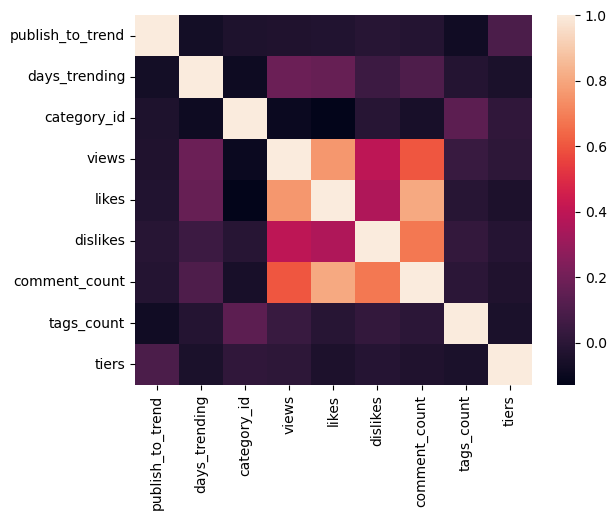

In [16]:
# visualize the correlations of the to help select features set
sns.heatmap(df.corr())

In [20]:
# Selecct views, likes, dislikes, comment_count as features
X = df[['views', 'likes', 'dislikes', 'comment_count']]
y = df['tiers']

In [21]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [22]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78) 

In [24]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


In [25]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [26]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,362,369
Actual 1,301,556


In [27]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,362,369
Actual 1,301,556


Accuracy Score : 0.5780856423173804
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       731
           1       0.60      0.65      0.62       857

    accuracy                           0.58      1588
   macro avg       0.57      0.57      0.57      1588
weighted avg       0.58      0.58      0.58      1588



In [29]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances


array([0.25844919, 0.25712346, 0.24078168, 0.24364567])

In [30]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2584491901438613, 'views'),
 (0.25712345897122935, 'likes'),
 (0.2436456665114435, 'comment_count'),
 (0.2407816843734658, 'dislikes')]